In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


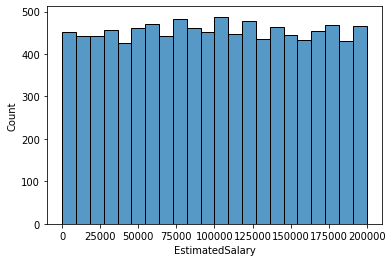

In [5]:
sns.histplot(x='EstimatedSalary', data=df);

Text(0, 0.5, 'Tenure')

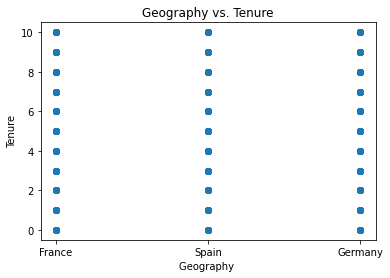

In [7]:
plt.scatter(df.Geography, df.Tenure)
plt.title('Geography vs. Tenure')
plt.xlabel('Geography ')
plt.ylabel('Tenure') 

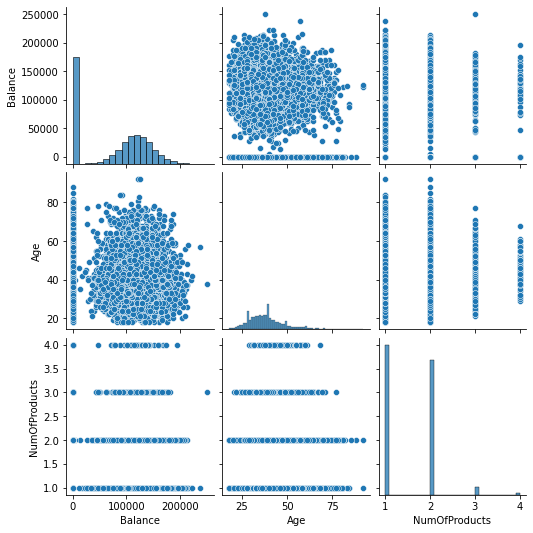

In [8]:
sns.pairplot(data=df[['Geography','Balance','Age','NumOfProducts']])

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

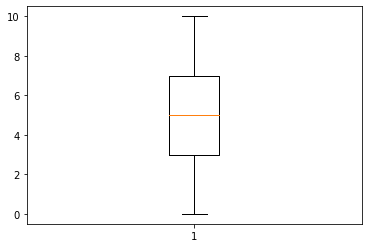

In [12]:
plt.boxplot(df["Tenure"])
plt.show()

In [28]:
median=float(df['EstimatedSalary'].median())
df['EstimatedSalary']=np.where(df['EstimatedSalary']<450,median,df['EstimatedSalary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


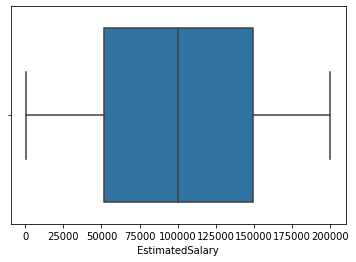

In [29]:
sns.boxplot(df['EstimatedSalary'])

In [25]:
# checking for categorial column
df.select_dtypes(include=['float64']).columns.tolist()

['Tenure', 'EstimatedSalary']

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Balance'] = le.fit_transform(df['Balance'])

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,5.0,0,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,5.0,743,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,5.0,5793,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,5.0,0,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,5.0,3696,1,1,1,79084.10,0


In [31]:
#dropping unwanted column
df.drop(['RowNumber'],axis=1,inplace=True)

In [32]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,0,Female,42,5.0,0,1,1,1,101348.88,1
1,15647311,Hill,608,2,Female,41,5.0,743,1,0,1,112542.58,0
2,15619304,Onio,502,0,Female,42,5.0,5793,3,1,0,113931.57,1
3,15701354,Boni,699,0,Female,39,5.0,0,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,Female,43,5.0,3696,1,1,1,79084.10,0


In [33]:
from sklearn.model_selection import train_test_split
# Split data (train & test data)
x=df.drop(['Exited'],axis=1)
y=df['Exited']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)
